In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime, date

# NOTE TO USER: ONLY RUN SEQUENTIALLY _(don't forget your namespaces)_

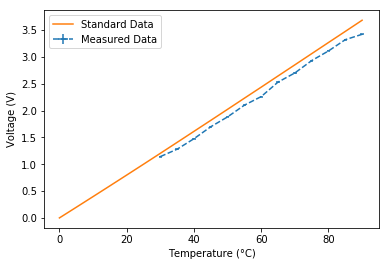

In [2]:
temp1 = np.array([30,35,40,45,50,55,60,65,70,75,80,85,90])
temp2 = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
measured = np.array([1.142,1.280,1.475,1.698,1.882,2.10,2.26,2.53,2.70,2.93,3.11,3.32,3.42])
expected = np.array([0,.198,.397,.597,.798,1,1.203,1.407,1.612,1.817,2.023,2.230,2.436,2.644,2.851,3.059,3.267,3.474,3.682])
plt.errorbar(temp1,measured,fmt = "--",label = "Measured Data", xerr = .5,yerr=.01)
plt.plot(temp2,expected, label = "Standard Data")
plt.legend()
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Voltage (V)')
plt.show()

# Aluminum Free Convection

In [3]:
dirPath = os.path.realpath('.')
fileName = 'rawData\AL_NewtonsCoolingComplete.csv'
filePath = os.path.join(dirPath, fileName)
df = pd.read_csv(filePath,header=0)
cols = df.columns

In [4]:
startTime = df[cols[0]][0]
timeArray = []
for i in range(0,len(df[cols[0]])):
    startTime = datetime.strptime(df[cols[0]][0], '%I:%M:%S %p')
    timeArray = []
for i in range(0,len(df[cols[0]])):
    timeArray.append((datetime.strptime(df[cols[0]][i], '%I:%M:%S %p') - startTime).total_seconds())

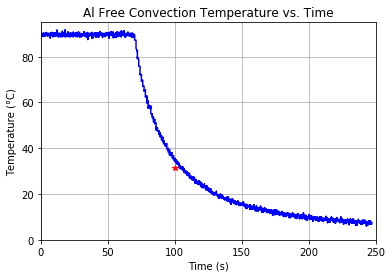

In [5]:
offsetValue = 4.1
tempWithOffset = df[cols[1]] + offsetValue
plt.plot(timeArray,tempWithOffset,'b')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.grid()
plt.title('Al Free Convection Temperature vs. Time')
plt.xlim([0,250])
plt.ylim([0,95])
plt.plot(timeArray[1005], df[cols[1]][1005],'*r')
plt.show()

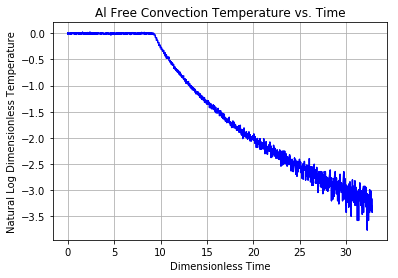

In [6]:
tempWithOffset = df[cols[1]] + offsetValue
Tinf = 4
T0= df[cols[1]][0] + offsetValue
theta = (tempWithOffset - Tinf)/(T0-Tinf)
rho= 2707
c = 879
R= .0254
k = 204
tauTime = k*np.array(timeArray)/(rho*c*R**2)  # dimensionless time

plt.plot(tauTime,np.log(theta),'b')
plt.xlabel('Dimensionless Time')
plt.ylabel('Natural Log Dimensionless Temperature')
plt.grid()
plt.title('Al Free Convection Temperature vs. Time')
plt.show()

In [7]:
Ttau = np.average(df[cols[1]][0:300]*(1-0.632))
print('Ttau =',Ttau)

Ttau = 31.504112


### Calculation of Time Constant $\tau$ for Free Convection Aluminum

In [8]:
Ttau = np.average(df[cols[1]][0:300]*(1/np.e))
Tau = []  # time constant
for i in range(0,len(df[cols[1]])):
    if np.abs(df[cols[1]][i]-Ttau) < 0.1:
        print(df[cols[1]][i])
        print('i =',i)
        Tau.append(timeArray[i])
print(len(timeArray))
testStart = 68
Tau = np.average(Tau) - testStart
print('Time constant, tau =',Tau)

31.5
i = 1005
2469
Time constant, tau = 32.0


### Calculation of $h$ for Free Convection Aluminum
From the value of tau calculated above, the value of h can be obtained using the relation, 
$$\tau = \frac{\rho V c}{hA}$$

In [9]:
h = rho*R*c/(3*Tau)
print('h =', h)
Bi = h*R/k
print('Biot =',Bi)

h = 629.56360625
Biot = 0.0783868411703


# Brass Free Convection

In [10]:
dirPath = os.path.realpath('.')
fileName = 'rawData\Brass_NewtonsCoolingComplete1.csv'
filePath = os.path.join(dirPath, fileName)
df = pd.read_csv(filePath,header=0)
cols = df.columns

In [11]:
startTime = df[cols[0]][0]
timeArray = []
for i in range(0,len(df[cols[0]])):
    startTime = datetime.strptime(df[cols[0]][0], '%I:%M:%S %p')
    timeArray = []
for i in range(0,len(df[cols[0]])):
    timeArray.append((datetime.strptime(df[cols[0]][i], '%I:%M:%S %p') - startTime).total_seconds())

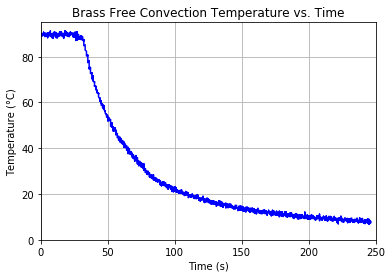

In [12]:
offsetValue = 4.1
tempWithOffset = df[cols[1]] + offsetValue
plt.plot(timeArray,tempWithOffset,'b')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.grid()
plt.title('Brass Free Convection Temperature vs. Time')
plt.xlim([0,250])
plt.ylim([0,95])
plt.show()

### Dimensionless Plot for Free Convection Brass

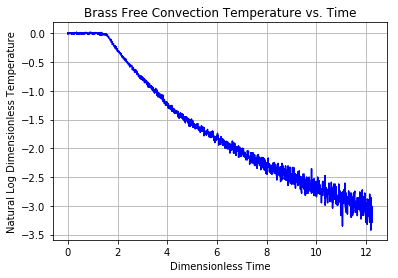

In [13]:
tempWithOffset = df[cols[1]] + offsetValue
Tinf = 4
T0= df[cols[1]][0] + offsetValue
theta = (tempWithOffset - Tinf)/(T0-Tinf)
# Brass material properties
rho= 8522
c = 380
R= .0254
k = 104
tauTime = k*np.array(timeArray)/(rho*c*R**2)  # dimensionless time

plt.plot(tauTime,np.log(theta),'b')
plt.xlabel('Dimensionless Time')
plt.ylabel('Natural Log Dimensionless Temperature')
plt.grid()
plt.title('Brass Free Convection Temperature vs. Time')
plt.show()

### Calculation of Time Constant $\tau$ for Free Convection Brass

In [14]:
Ttau = np.average(df[cols[1]][0:300]*(1/np.e))
Tau = []  # time constant
for i in range(0,len(df[cols[1]])):
    if np.abs(df[cols[1]][i]-Ttau) < 0.1:
        print(df[cols[1]][i])
        print('i =',i)
        Tau.append(timeArray[i])
print(len(timeArray))
testStart = 32
Tau = np.average(Tau) - testStart
print('Time constant, tau =',Tau)

31.4
i = 694
31.4
i = 702
2469
Time constant, tau = 37.5


### Calculation of $h$ for Free Convection Brass

In [15]:
h = rho*R*c/(3*Tau)
print('h =', h)
Bi = h*R/k
print('Biot =',Bi)

h = 731.149724444
Biot = 0.178569259624


# Aluminum Forced Convection

In [16]:
dirPath = os.path.realpath('.')
fileName = 'rawData\Al_ForcedConvection.csv'
filePath = os.path.join(dirPath, fileName)
df = pd.read_csv(filePath,header=0)
cols = df.columns

In [17]:
startTime = df[cols[0]][0]
timeArray = []
for i in range(0,len(df[cols[0]])):
    startTime = datetime.strptime(df[cols[0]][0], '%I:%M:%S %p')
    timeArray = []
for i in range(0,len(df[cols[0]])):
    timeArray.append((datetime.strptime(df[cols[0]][i], '%I:%M:%S %p') - startTime).total_seconds())

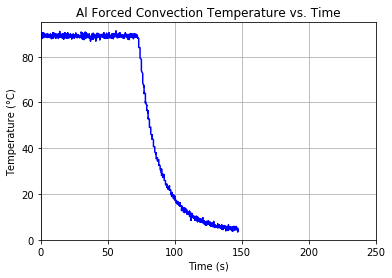

In [18]:
offsetValue = 4.6
tempWithOffset = df[cols[1]] + offsetValue

plt.plot(timeArray,tempWithOffset,'b')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.grid()
plt.title('Al Forced Convection Temperature vs. Time')
plt.xlim([0,250])
plt.ylim([0,95])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in log


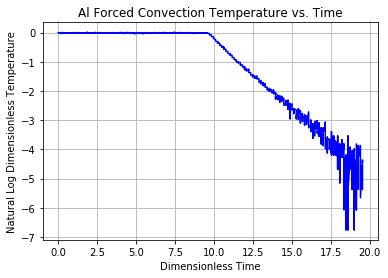

In [19]:
tempWithOffset = df[cols[1]] + offsetValue
Tinf = 4
T0= df[cols[1]][0] + offsetValue
theta = (tempWithOffset - Tinf)/(T0-Tinf)
rho= 2707
c = 879
R= .0254
k = 204
tauTime = k*np.array(timeArray)/(rho*c*R**2)  # dimensionless time

plt.plot(tauTime,np.log(theta),'b')
plt.xlabel('Dimensionless Time')
plt.ylabel('Natural Log Dimensionless Temperature')
plt.grid()
plt.title('Al Forced Convection Temperature vs. Time')
plt.show()

### Aluminum Forced Convection Time Constant Calculations

In [20]:
Ttau = np.average(df[cols[1]][0:300]*(1/np.e))
Tau = []  # time constant
for i in range(0,len(df[cols[1]])):
    if np.abs(df[cols[1]][i]-Ttau) < 0.1:
        print(df[cols[1]][i])
        print('i =',i)
        Tau.append(timeArray[i])
print(len(timeArray))
testStart = 75
Tau = np.average(Tau) - testStart
print('Time constant, tau =',Tau)

31.0
i = 862
31.0
i = 864
1469
Time constant, tau = 12.0


### Calculation of $h$ for Forced Convection Aluminum

In [21]:
h = rho*R*c/(3*Tau)
print('h =', h)
Bi = h*R/k
print('Biot =',Bi)

h = 1678.83628333
Biot = 0.209031576454


# Brass Forced Convection

In [22]:
dirPath = os.path.realpath('.')
fileName = 'rawData\Brass_ForcedConvection1.csv'
filePath = os.path.join(dirPath, fileName)
df = pd.read_csv(filePath,header=0)
cols = df.columns

In [23]:
startTime = df[cols[0]][0]
timeArray = []
for i in range(0,len(df[cols[0]])):
    startTime = datetime.strptime(df[cols[0]][0], '%I:%M:%S %p')
    timeArray = []
for i in range(0,len(df[cols[0]])):
    timeArray.append((datetime.strptime(df[cols[0]][i], '%I:%M:%S %p') - startTime).total_seconds())

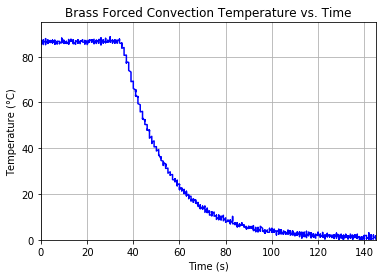

In [24]:
offsetValue = 2.3
tempWithOffset = df[cols[1]] + offsetValue
plt.plot(timeArray,tempWithOffset,'b')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.grid()
plt.title('Brass Forced Convection Temperature vs. Time')
plt.xlim([0,145])
plt.ylim([0,95])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in log


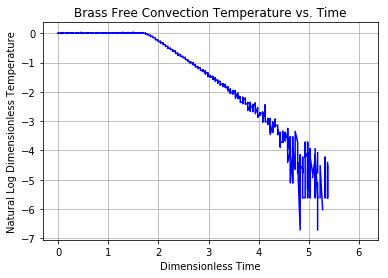

In [25]:
tempWithOffset = df[cols[1]] + offsetValue
Tinf = 3
T0= df[cols[1]][0] + offsetValue
theta = (tempWithOffset - Tinf)/(T0-Tinf)
# material properties
rho= 8522
c = 380
R= .0254
k = 104
tauTime = k*np.array(timeArray)/(rho*c*R**2)  # dimensionless time

plt.plot(tauTime,np.log(theta),'b')
plt.xlabel('Dimensionless Time')
plt.ylabel('Natural Log Dimensionless Temperature')
plt.grid()
plt.title('Brass Free Convection Temperature vs. Time')
plt.show()

### Aluminum Forced Convection Time Constant Calculations

In [26]:
Ttau = np.average(df[cols[1]][0:300]*(1/np.e))
Tau = []  # time constant
for i in range(0,len(df[cols[1]])):
    if np.abs(df[cols[1]][i]-Ttau) < 0.1:
        print(df[cols[1]][i])
        print('i =',i)
        Tau.append(timeArray[i])
print(len(timeArray))
testStart = 35
Tau = np.average(Tau) - testStart
print('Time constant, tau =',Tau)

31.0
i = 533
1469
Time constant, tau = 18.0


### Calculation of $h$ for Forced Convection Aluminum

In [27]:
h = rho*R*c/(3*Tau)
print('h =', h)
Bi = h*R/k
print('Biot =',Bi)

h = 1523.22859259
Biot = 0.372019290883


In [29]:
1/50

0.02